# SLC32A1

Heterozyogous variants in SLC32A1 are associated with
two autosomal dominant conditions, [developmental and epileptic encephalopathy-114 (DEE114)](https://omim.org/entry/620774)
and [generalized epilepsy with febrile seizures plus-12 (GEFSP12)](https://omim.org/entry/620755).

In [49]:
import hpotk
import gpsea

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release='v2024-08-13')
print(f'Loaded HPO v{hpo.version}.')
print(f"Using gpsea version {gpsea.__version__}.")

Loaded HPO v2024-08-13.
Using gpsea version 0.4.2.dev0.


### SLC32A1
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for SLC32A1.

In [61]:
gene_symbol = 'SLC32A1'
mane_tx_id = 'NM_080552.3'
mane_protein_id = 'NP_542119.1' # vesicular inhibitory amino acid transporter

In [62]:
from ppktstore.registry import configure_phenopacket_registry
phenopacket_registry = configure_phenopacket_registry()
with phenopacket_registry.open_phenopacket_store("0.1.20") as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))
print(f'Loaded {len(phenopackets)} phenopackets')

from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets
cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(  
    phenopackets=phenopackets,
    cohort_creator=cohort_creator,
)


Loaded 38 phenopackets
Individuals Processed: 100%|██████████| 38/38 [00:00<00:00, 1386.41individuals/s]


In [63]:
from gpsea.view import CohortViewable

cv = CohortViewable(hpo)
cv.process(cohort, transcript_id=mane_tx_id)

HPO Term,ID,Seen in n individuals
Febrile seizure (within the age range of 3 months to 6 years),HP:0002373,23
Generalized-onset seizure,HP:0002197,11
Focal-onset seizure,HP:0007359,7
Hypotonia,HP:0001252,4
Developmental regression,HP:0002376,4
Motor delay,HP:0001270,4
Delayed speech and language development,HP:0000750,4
Intellectual disability,HP:0001249,4
Bilateral tonic-clonic seizure with generalized onset,HP:0025190,3
Focal impaired awareness seizure,HP:0002384,3


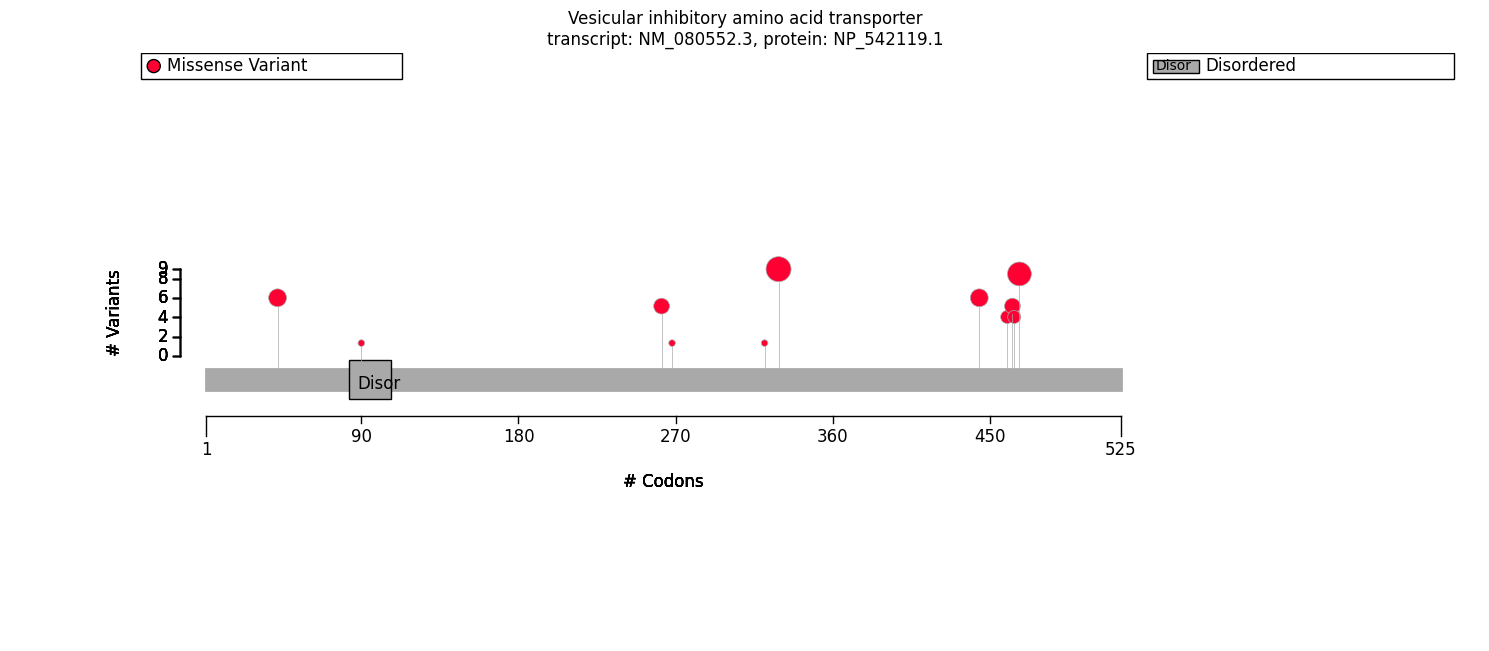

In [64]:
from gpsea.model.genome import GRCh38
from gpsea.model import ProteinMetadata
from gpsea.preprocessing import configure_default_protein_metadata_service, VVMultiCoordinateService
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

txc_service = VVMultiCoordinateService(genome_build=GRCh38)
pms = configure_default_protein_metadata_service()
tx_coordinates = txc_service.fetch(mane_tx_id)
protein_meta = pms.annotate(mane_protein_id)

#protein_meta = ProteinMetadata.from_uniprot_json(
#        protein_id=mane_protein_id,
#        label="SLC31A1",
#        uniprot_json="Q9H598.json",
#        protein_length=550,
#)

fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein_diagram(
    tx_coordinates,
    protein_meta,
    cohort,
    ax=ax,
)
fig.tight_layout()

# Strategy
No genotype-phenotype correlations were identified in the published literature. All pathogenic variants are missense. Therefore, we will search for the most common variant and for N-terminal vs. C-terminal.

TODO -- redo notebook after fixing ProteinMetadata

In [54]:
from gpsea.model import VariantEffect
from gpsea.model.genome import Region

from gpsea.analysis.predicate.genotype import VariantPredicates, autosomal_dominant

n_term = VariantPredicates.region(region=Region(0, 360), tx_id=mane_tx_id)
gt_predicate = autosomal_dominant(n_term)

In [55]:
from gpsea.model import FeatureType
from gpsea.analysis.predicate.phenotype import prepare_predicates_for_terms_of_interest
from gpsea.analysis.pcats.stats import FisherExactTest
from gpsea.analysis.mtc_filter import HpoMtcFilter
from gpsea.analysis.pcats import HpoTermAnalysis

pheno_predicates = prepare_predicates_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

mtc_filter = HpoMtcFilter.default_filter(hpo=hpo, term_frequency_threshold=0.2)
mtc_correction = 'fdr_bh'
statistic = FisherExactTest()

analysis = HpoTermAnalysis(
    count_statistic=statistic,
    mtc_filter=mtc_filter,
    mtc_correction=mtc_correction,
    mtc_alpha=0.05,
)

result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=gt_predicate,
    pheno_predicates=pheno_predicates,
)
from gpsea.view import MtcStatsViewer

viewer = MtcStatsViewer()
viewer.process(result)


Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.2,6
HMF04,Skipping term because all genotypes have same HPO observed proportions,5
HMF06,Skipping term with less than 7 observations (not powered for 2x2),59
HMF08,Skipping general term,28


In [65]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=result)

Sex of the individual                              FEMALE           MALE  \
                                                    Count Percent  Count   
Febrile seizure (within the age range of 3 mont...  11/17     65%  12/16   
Focal-onset seizure [HP:0007359]                     6/19     32%   4/18   
Bilateral tonic-clonic seizure [HP:0002069]           3/3    100%    3/4   

Sex of the individual                                                          \
                                                   Percent Corrected p values   
Febrile seizure (within the age range of 3 mont...     75%                1.0   
Focal-onset seizure [HP:0007359]                       22%                1.0   
Bilateral tonic-clonic seizure [HP:0002069]            75%                1.0   

Sex of the individual                                         
                                                    p values  
Febrile seizure (within the age range of 3 mont...  0.707985  
Focal-onset seizure [HP:0007359]                    0.713982  
Bilateral tonic-clonic seizure [HP:0002069]         1.000000

In [66]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=result)

Sex of the individual                              FEMALE           MALE  \
                                                    Count Percent  Count   
Febrile seizure (within the age range of 3 mont...  11/17     65%  12/16   
Focal-onset seizure [HP:0007359]                     6/19     32%   4/18   
Bilateral tonic-clonic seizure [HP:0002069]           3/3    100%    3/4   

Sex of the individual                                                          \
                                                   Percent Corrected p values   
Febrile seizure (within the age range of 3 mont...     75%                1.0   
Focal-onset seizure [HP:0007359]                       22%                1.0   
Bilateral tonic-clonic seizure [HP:0002069]            75%                1.0   

Sex of the individual                                         
                                                    p values  
Febrile seizure (within the age range of 3 mont...  0.707985  
Focal-onset seizure [HP:0007359]                    0.713982  
Bilateral tonic-clonic seizure [HP:0002069]         1.000000

In [68]:
from gpsea.analysis.predicate.genotype import VariantPredicates, monoallelic_predicate
is_var_key = VariantPredicates.variant_key("20_38728050_38728050_T_C") # c.989T>C	p.Met330Thr
gt_predicate = monoallelic_predicate(
    a_predicate=is_var_key,
    b_predicate= ~is_var_key,
    names=('p.Asn159Ser', 'Other variant')
)
gt_predicate.display_question()

'Allele group: p.Asn159Ser, Other variant'

In [69]:
result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=gt_predicate,
    pheno_predicates=pheno_predicates,
)
summarize_hpo_analysis(hpo=hpo, result=result)

Allele group                                       p.Asn159Ser          \
                                                         Count Percent   
Bilateral tonic-clonic seizure with generalized...         2/9     22%   
Focal-onset seizure [HP:0007359]                           1/9     11%   
Bilateral tonic-clonic seizure [HP:0002069]                2/2    100%   
Febrile seizure (within the age range of 3 mont...         6/9     67%   

Allele group                                       Other variant          \
                                                           Count Percent   
Bilateral tonic-clonic seizure with generalized...          1/26      4%   
Focal-onset seizure [HP:0007359]                            9/28     32%   
Bilateral tonic-clonic seizure [HP:0002069]                  4/5     80%   
Febrile seizure (within the age range of 3 mont...         17/24     71%   

Allele group                                                           \
                                                   Corrected p values   
Bilateral tonic-clonic seizure with generalized...           0.623377   
Focal-onset seizure [HP:0007359]                             0.786489   
Bilateral tonic-clonic seizure [HP:0002069]                  1.000000   
Febrile seizure (within the age range of 3 mont...           1.000000   

Allele group                                                  
                                                    p values  
Bilateral tonic-clonic seizure with generalized...  0.155844  
Focal-onset seizure [HP:0007359]                    0.393245  
Bilateral tonic-clonic seizure [HP:0002069]         1.000000  
Febrile seizure (within the age range of 3 mont...  1.000000

# M/F differences

In [70]:
from gpsea.analysis.predicate.genotype import sex_predicate
result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=sex_predicate(),
    pheno_predicates=pheno_predicates,
)
from gpsea.view import summarize_hpo_analysis
summary_df = summarize_hpo_analysis(hpo, result)
summary_df

Sex of the individual                              FEMALE           MALE  \
                                                    Count Percent  Count   
Febrile seizure (within the age range of 3 mont...  11/17     65%  12/16   
Focal-onset seizure [HP:0007359]                     6/19     32%   4/18   
Bilateral tonic-clonic seizure [HP:0002069]           3/3    100%    3/4   

Sex of the individual                                                          \
                                                   Percent Corrected p values   
Febrile seizure (within the age range of 3 mont...     75%                1.0   
Focal-onset seizure [HP:0007359]                       22%                1.0   
Bilateral tonic-clonic seizure [HP:0002069]            75%                1.0   

Sex of the individual                                         
                                                    p values  
Febrile seizure (within the age range of 3 mont...  0.707985  
Focal-onset seizure [HP:0007359]                    0.713982  
Bilateral tonic-clonic seizure [HP:0002069]         1.000000

# Summary
No statistically significant genotype-phenotype correlation was identified.